In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

In [10]:
file_path = '..\\data\\raw\\Churn_Modelling.csv'

In [11]:
try:
    df = pd.read_csv(file_path)
    print(f"Данные успешно загружены. Размер: {df.shape}")
except FileNotFoundError:
    print(f"Ошибка: Файл не найден по пути '{file_path}'. Проверьте путь.")

Данные успешно загружены. Размер: (10000, 14)


In [12]:
print("\n--- Первые 5 строк данных ---")
print(df.head())


--- Первые 5 строк данных ---
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9

In [13]:
print("\n--- Информация о типах данных и пропусках ---")
df.info()


--- Информация о типах данных и пропусках ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
print("\n--- Основные статистические показатели (числовые признаки) ---")
print(df.describe(include='all'))


--- Основные статистические показатели (числовые признаки) ---
          RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age   

In [15]:
print("\n--- Проверка на полные дубликаты строк ---")
num_duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {num_duplicates}")


--- Проверка на полные дубликаты строк ---
Количество полных дубликатов: 0


In [16]:
print("\n--- Удаление идентификаторов и персональных данных ---")
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_eda = df.drop(columns=columns_to_drop)
print(f"Удалены колонки: {columns_to_drop}")
print(f"Новый размер датафрейма для EDA: {df_eda.shape}")
print("Колонки после удаления:", df_eda.columns.tolist())


--- Удаление идентификаторов и персональных данных ---
Удалены колонки: ['RowNumber', 'CustomerId', 'Surname']
Новый размер датафрейма для EDA: (10000, 11)
Колонки после удаления: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [26]:
print("\n--- Анализ целевой переменной 'Exited' ---")
churn_counts = df_eda['Exited'].value_counts()
churn_rate = df_eda['Exited'].value_counts(normalize=True) * 100

print(f"Распределение классов:\n{churn_counts}")
print(f"\nДоля классов (%):\n{churn_rate}")


--- Анализ целевой переменной 'Exited' ---
Распределение классов:
Exited
0    7963
1    2037
Name: count, dtype: int64

Доля классов (%):
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


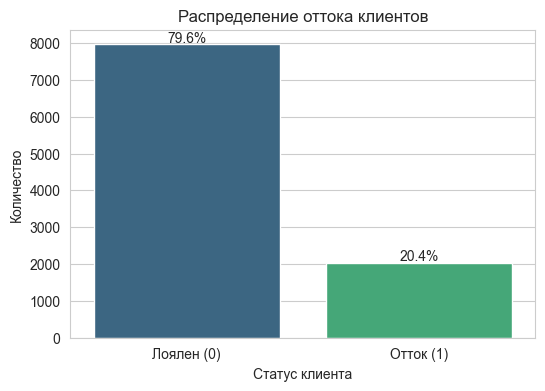

Наблюдение: Наблюдается дисбаланс классов, отточных клиентов значительно меньше (~20%).


In [19]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Exited', data=df_eda, palette='viridis')
plt.title('Распределение оттока клиентов')
plt.xlabel('Статус клиента')
plt.ylabel('Количество')

total = len(df_eda['Exited'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 50 # Сдвиг текста немного вверх
    ax.annotate(percentage, (x, y), ha='center')

plt.xticks([0, 1], ['Лоялен (0)', 'Отток (1)'])
plt.show()
print("Наблюдение: Наблюдается дисбаланс классов, отточных клиентов значительно меньше (~20%).")


--- Анализ категориальных признаков ---


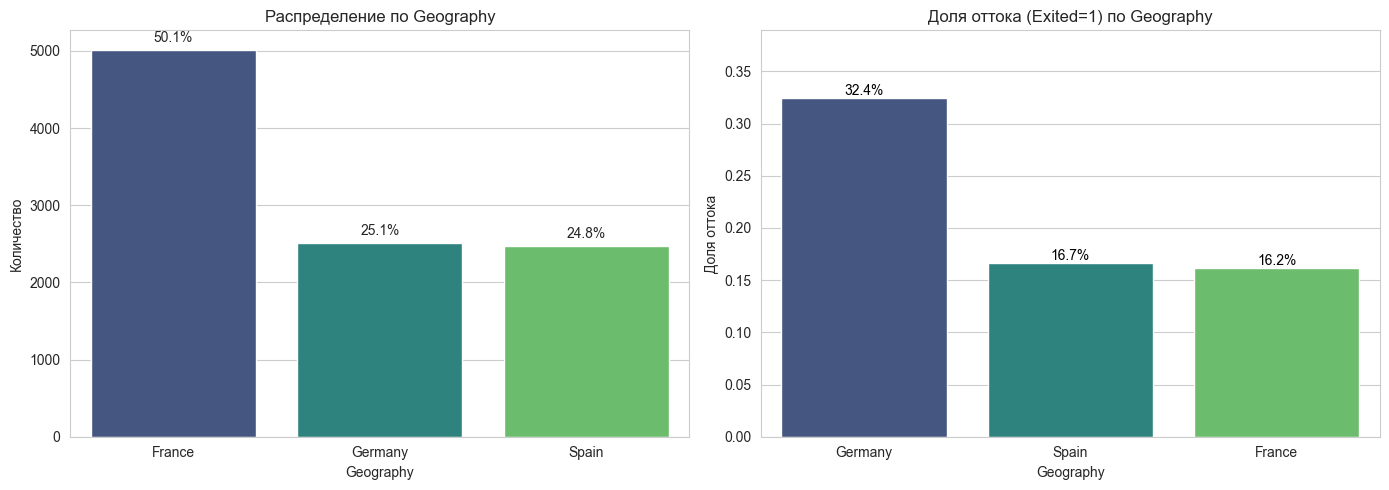


Доля оттока по 'Geography':
  Geography    Exited
1   Germany  0.324432
2     Spain  0.166734
0    France  0.161548
----------------------------------------


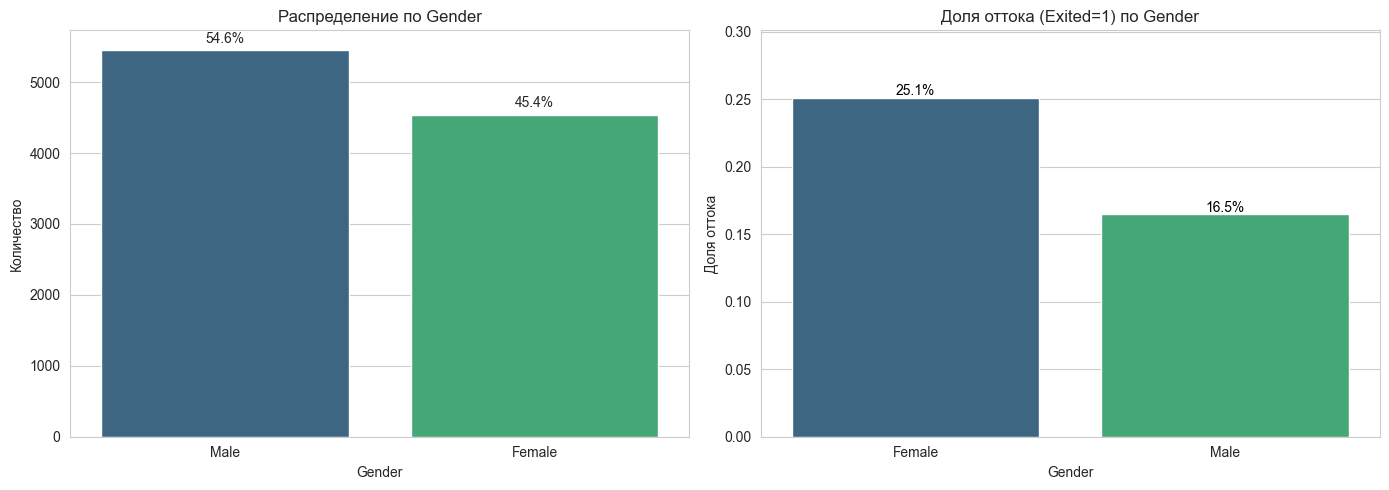


Доля оттока по 'Gender':
   Gender    Exited
0  Female  0.250715
1    Male  0.164559
----------------------------------------


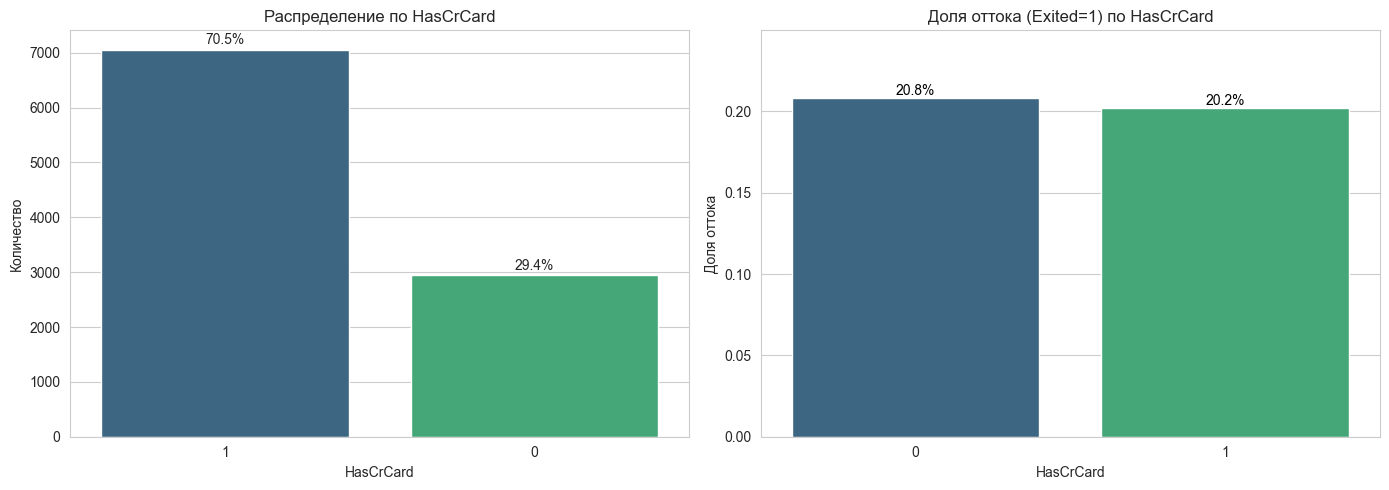


Доля оттока по 'HasCrCard':
   HasCrCard    Exited
0          0  0.208149
1          1  0.201843
----------------------------------------


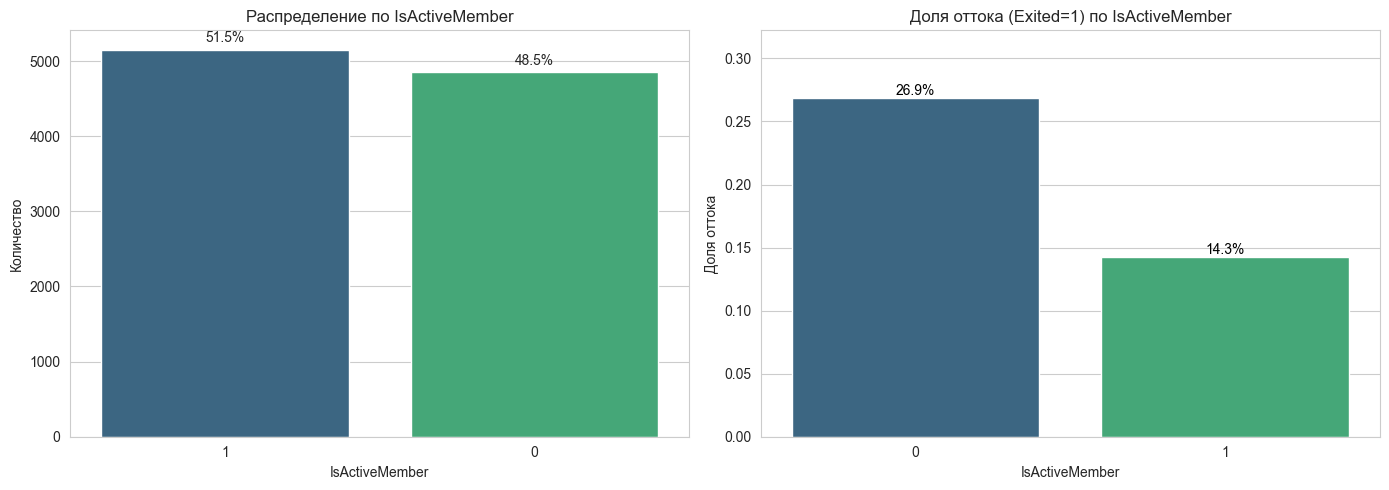


Доля оттока по 'IsActiveMember':
   IsActiveMember    Exited
0               0  0.268509
1               1  0.142691
----------------------------------------


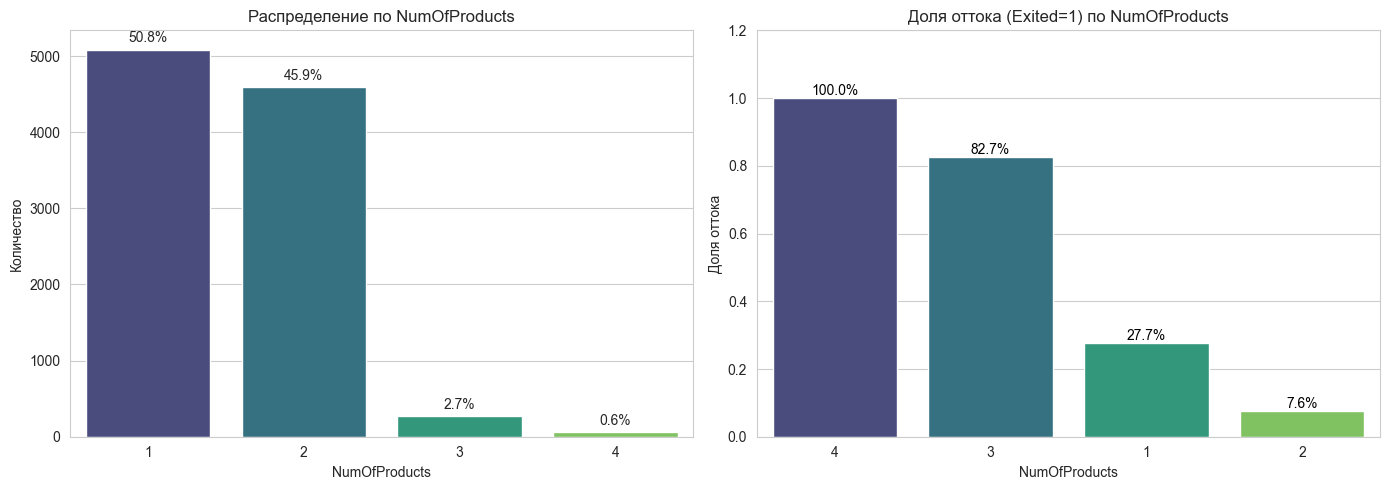


Доля оттока по 'NumOfProducts':
   NumOfProducts    Exited
3              4  1.000000
2              3  0.827068
0              1  0.277144
1              2  0.075817
----------------------------------------


In [27]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
print("\n--- Анализ категориальных признаков ---")

for feature in categorical_features:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=feature, data=df_eda, palette='viridis', order=df_eda[feature].value_counts().index)
    plt.title(f'Распределение по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')

    total = len(df_eda[feature])
    for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + (total * 0.01)
        ax1.annotate(percentage, (x, y), ha='center')

    plt.subplot(1, 2, 2)

    churn_by_feature = df_eda.groupby(feature)['Exited'].mean().reset_index()
    ax2 = sns.barplot(x=feature, y='Exited', data=churn_by_feature, palette='viridis',
                      order=churn_by_feature.sort_values('Exited', ascending=False)[feature])
    plt.title(f'Доля оттока (Exited=1) по {feature}')
    plt.xlabel(feature)
    plt.ylabel('Доля оттока')
    plt.ylim(0, max(churn_by_feature['Exited']) * 1.2)

    for p in ax2.patches:
        height = p.get_height()
        ax2.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

    plt.tight_layout()
    plt.show()

    print(f"\nДоля оттока по '{feature}':")
    print(churn_by_feature.sort_values('Exited', ascending=False))
    print("-" * 40)


--- Анализ числовых признаков ---


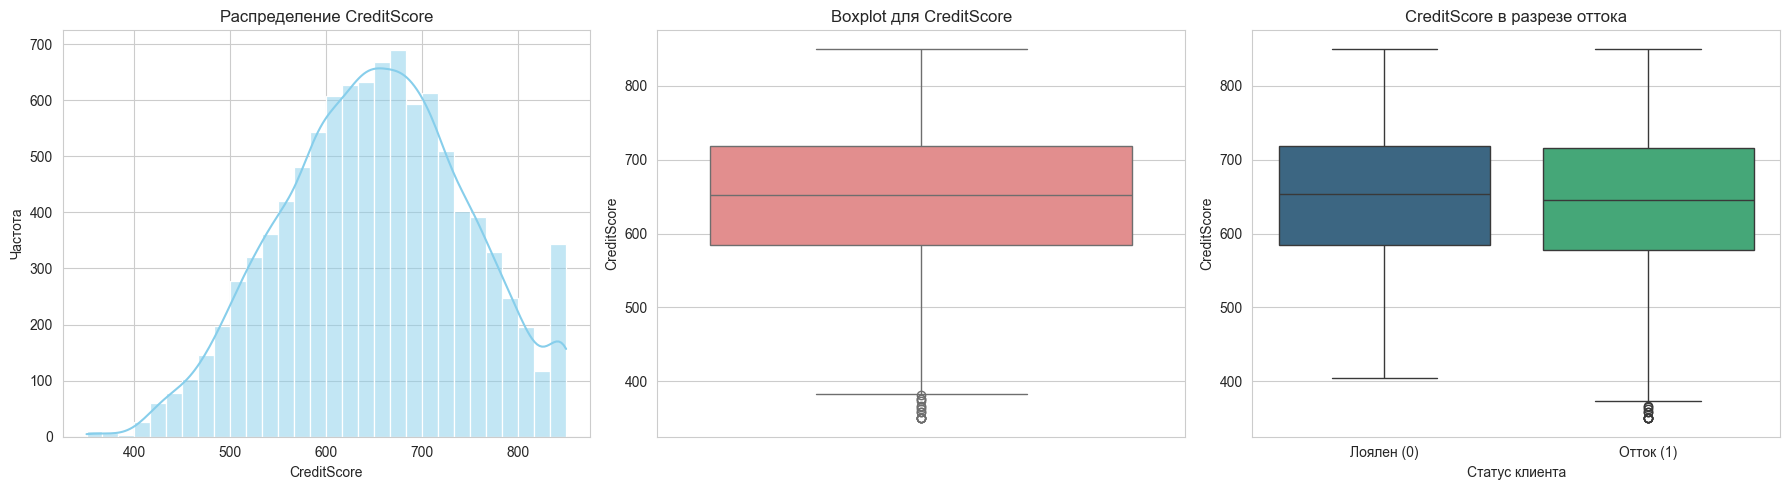


Статистики для 'CreditScore' по группам оттока:
         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0
----------------------------------------


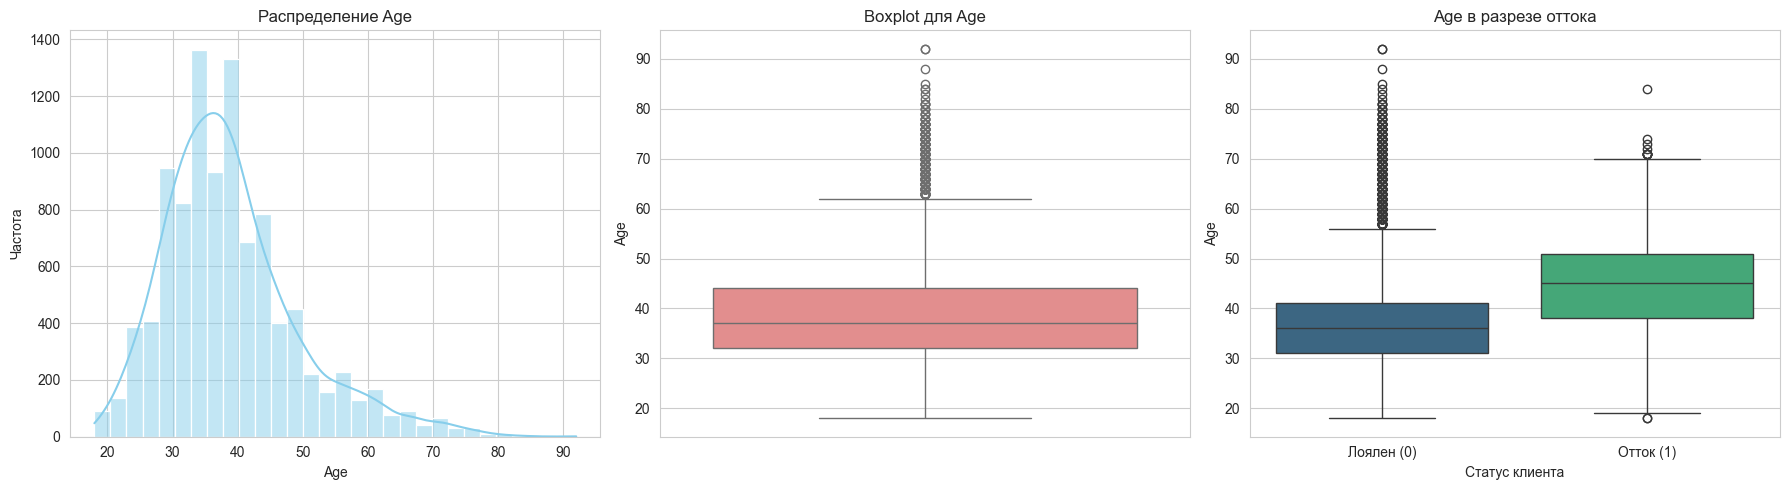


Статистики для 'Age' по группам оттока:
         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0
----------------------------------------


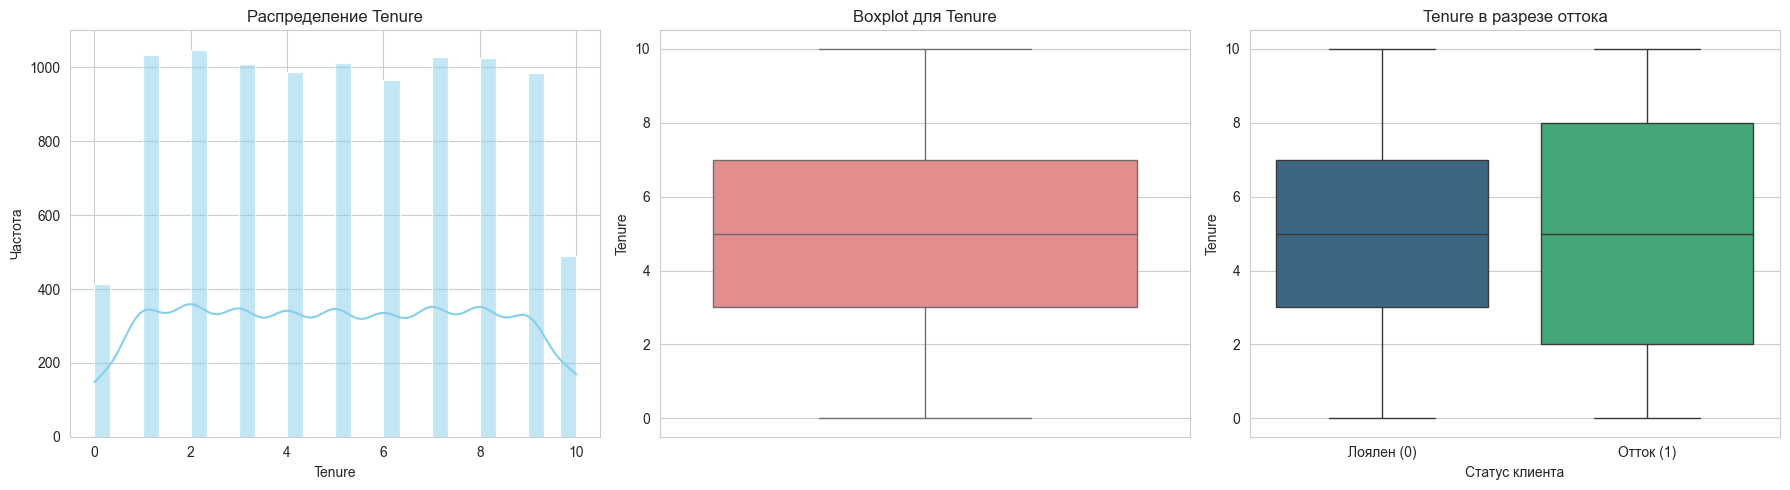


Статистики для 'Tenure' по группам оттока:
         count      mean       std  min  25%  50%  75%   max
Exited                                                      
0       7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1       2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0
----------------------------------------


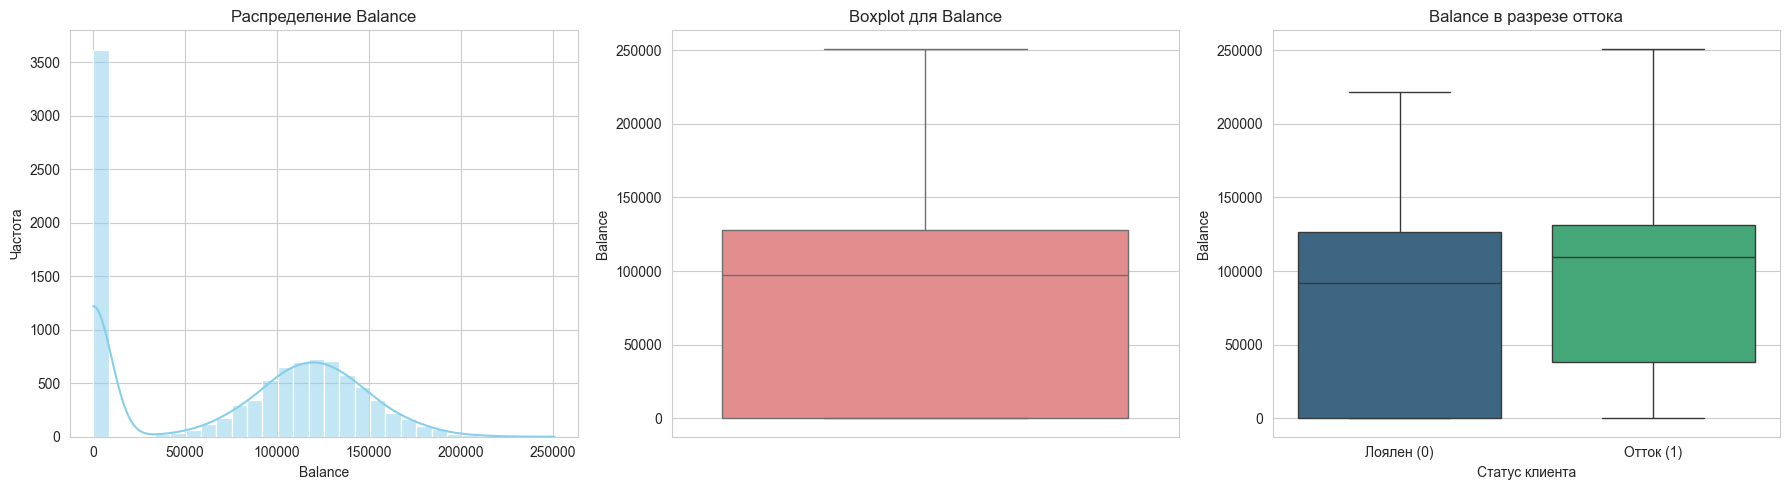


Статистики для 'Balance' по группам оттока:
         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  
----------------------------------------


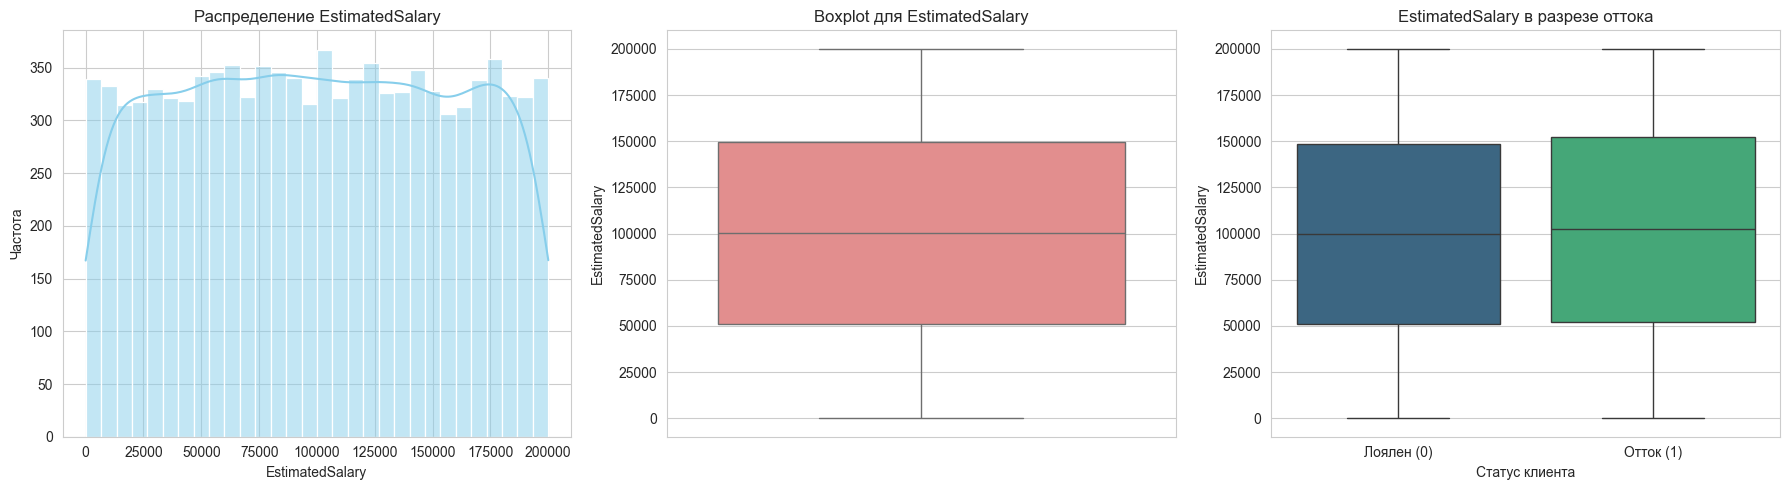


Статистики для 'EstimatedSalary' по группам оттока:
         count           mean           std    min       25%        50%  \
Exited                                                                    
0       7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148609.955  199992.48  
1       152422.910  199808.10  
----------------------------------------


In [28]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
print("\n--- Анализ числовых признаков ---")

for feature in numerical_features:
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(df_eda[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=df_eda[feature], color='lightcoral')
    plt.title(f'Boxplot для {feature}')
    plt.ylabel(feature)

    plt.subplot(1, 3, 3)
    sns.boxplot(x='Exited', y=feature, data=df_eda, palette='viridis')
    plt.title(f'{feature} в разрезе оттока')
    plt.xlabel('Статус клиента')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['Лоялен (0)', 'Отток (1)'])

    plt.tight_layout()
    plt.show()

    print(f"\nСтатистики для '{feature}' по группам оттока:")
    print(df_eda.groupby('Exited')[feature].describe())
    print("-" * 40)


--- Анализ корреляций между признаками ---
Колонка 'Gender' преобразована в числовой формат (0/1).
Колонка 'Geography' преобразована с помощью One-Hot Encoding.
Новые колонки: ['Geo_Germany', 'Geo_Spain']


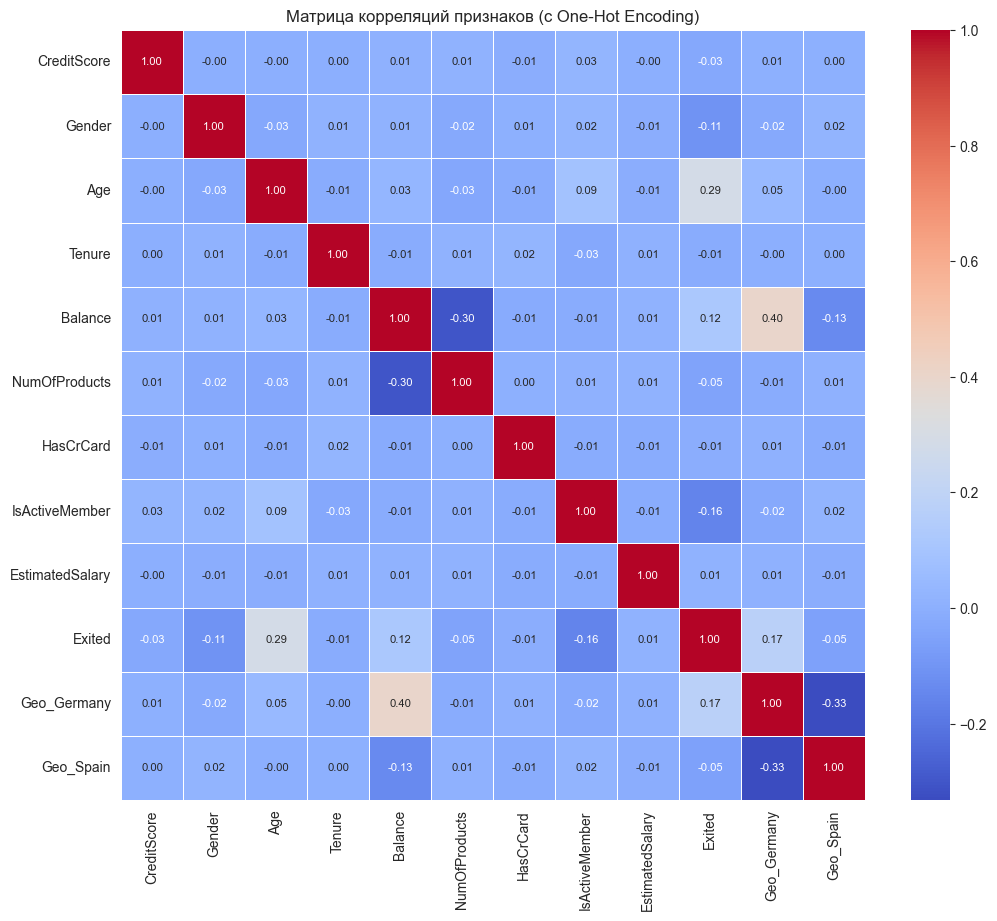


--- Корреляция признаков с целевой переменной 'Exited' ---
Exited             1.000000
Age                0.285323
Geo_Germany        0.173488
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Geo_Spain         -0.052667
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [30]:
print("\n--- Анализ корреляций между признаками ---")

df_corr = df_eda.copy()

if df_corr['Gender'].dtype == 'object':
    df_corr['Gender'] = df_corr['Gender'].apply(lambda x: 1 if x == 'Male' else 0) # Male=1, Female=0
    print("Колонка 'Gender' преобразована в числовой формат (0/1).")

if 'Geography' in df_corr.columns and df_corr['Geography'].dtype == 'object':
    df_corr = pd.get_dummies(df_corr, columns=['Geography'], prefix='Geo', drop_first=True)
    print("Колонка 'Geography' преобразована с помощью One-Hot Encoding.")
    print("Новые колонки:", [col for col in df_corr.columns if col.startswith('Geo_')])
else:
    print("Колонка 'Geography' не найдена или уже не является строковой.")


try:
    correlation_matrix = df_corr.corr(numeric_only=True)

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Матрица корреляций признаков (с One-Hot Encoding)')
    plt.show()

    print("\n--- Корреляция признаков с целевой переменной 'Exited' ---")
    if 'Exited' in correlation_matrix.columns:
        corr_target = correlation_matrix['Exited'].sort_values(ascending=False)
        print(corr_target)
    else:
        print("Целевая переменная 'Exited' не найдена в матрице корреляций.")

except Exception as e:
    print(f"\nВозникла ошибка при расчете или отображении матрицы корреляций: {e}")
    print("Текущие типы данных в df_corr:")
    print(df_corr.dtypes)